In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Twitter Api Credentials
#Consumer

CONSUMER_KEY    = '**************************************************'
CONSUMER_SECRET = '**************************************************'
         
#Access:
ACCESS_TOKEN  = '**************************************************'
ACCESS_SECRET = '**************************************************'



In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

In [4]:
# Set the access token and access token secret
authenticate.set_access_token(ACCESS_TOKEN,ACCESS_SECRET) 

In [5]:
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="narendramodi", count = 1000, lang ="en", tweet_mode="extended") 

In [7]:
#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Thank you, Prime Minister @PresRajapaksa! It was a pleasure to speak to you. Once again, many congratulations. We will work together to further advance all areas of bilateral cooperation and to take our special ties to ever newer heights. https://t.co/123ahoxlMo

2) At 11 AM on Friday, 7th August, I would be addressing the ‘Conclave on Transformational Reforms in Higher Education under National Education Policy.’  

This conclave will emphasise on how the changes in India’s education sector will benefit youngsters. https://t.co/JkYXosI7WF

3) Remembering Sushma Ji on her first Punya Tithi. Her untimely and unfortunate demise left many saddened. She served India selflessly and was an articulate voice for India at the world stage. 

Here is what I had spoken at a prayer meet in her memory. 

https://t.co/nHIXCw469P

4) Saddened by the tragic hospital fire in Ahmedabad. Condolences to the bereaved families. May the injured recover soon. Spoke to CM @vijayrupa

In [8]:
# Create a dataframe with a column called Tweets
tweets_df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [9]:
# Show the first 5 rows of data
tweets_df.head()

,Tweets
0,"Thank you, Prime Minister @PresRajapaksa! It w..."
1,"At 11 AM on Friday, 7th August, I would be add..."
2,Remembering Sushma Ji on her first Punya Tithi...
3,Saddened by the tragic hospital fire in Ahmeda...
4,A blessed day in Ayodhya. \n\nThis day will re...


In [10]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [11]:
# Clean the tweets
tweets_df['Tweets'] = tweets_df['Tweets'].apply(cleanTxt)

In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [13]:
# Create two new columns 'Subjectivity' & 'Polarity'
tweets_df['Subjectivity'] = tweets_df['Tweets'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Tweets'].apply(getPolarity)

In [14]:
tweets_df

,Tweets,Subjectivity,Polarity
0,"Thank you, Prime Minister ! It was a pleasure ...",0.523810,0.285714
1,"At 11 AM on Friday, 7th August, I would be add...",0.500000,0.250000
2,Remembering Sushma Ji on her first Punya Tithi...,0.458333,0.062500
3,Saddened by the tragic hospital fire in Ahmeda...,0.875000,-0.375000
4,A blessed day in Ayodhya. \n\nThis day will re...,0.477273,0.318182
...,...,...,...
195,देववाणीं संस्कृतभाषां वैश्विके पटले प्रचारप्रस...,0.000000,0.000000
196,"For 4India Karyakartas, serving the nation com...",0.666667,0.375000
197,My address at the programme marking Dharma Cha...,0.000000,0.000000
198,विस्तारवाद का युग समाप्त हो चुका है। यह युग वि...,0.000000,0.000000


In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

In [16]:
tweets_df['Analysis'] = tweets_df['Polarity'].apply(getAnalysis)

In [17]:
tweets_df

,Tweets,Subjectivity,Polarity,Analysis
0,"Thank you, Prime Minister ! It was a pleasure ...",0.523810,0.285714,Positive
1,"At 11 AM on Friday, 7th August, I would be add...",0.500000,0.250000,Positive
2,Remembering Sushma Ji on her first Punya Tithi...,0.458333,0.062500,Positive
3,Saddened by the tragic hospital fire in Ahmeda...,0.875000,-0.375000,Negative
4,A blessed day in Ayodhya. \n\nThis day will re...,0.477273,0.318182,Positive
...,...,...,...,...
195,देववाणीं संस्कृतभाषां वैश्विके पटले प्रचारप्रस...,0.000000,0.000000,Neutral
196,"For 4India Karyakartas, serving the nation com...",0.666667,0.375000,Positive
197,My address at the programme marking Dharma Cha...,0.000000,0.000000,Neutral
198,विस्तारवाद का युग समाप्त हो चुका है। यह युग वि...,0.000000,0.000000,Neutral


In [18]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = tweets_df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Thank you, Prime Minister ! It was a pleasure to speak to you. Once again, many congratulations. We will work together to further advance all areas of bilateral cooperation and to take our special ties to ever newer heights. 

2) At 11 AM on Friday, 7th August, I would be addressing the ‘Conclave on Transformational Reforms in Higher Education under National Education Policy.’  

This conclave will emphasise on how the changes in India’s education sector will benefit youngsters. 

3) Remembering Sushma Ji on her first Punya Tithi. Her untimely and unfortunate demise left many saddened. She served India selflessly and was an articulate voice for India at the world stage. 

Here is what I had spoken at a prayer meet in her memory. 



4) A blessed day in Ayodhya. 

This day will remain etched in the memory of every Indian.

May the blessings of Bhagwan Shree Ram always be upon us. May India scale new heights of progress. May every Indian be healthy and prosp

In [19]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Saddened by the tragic hospital fire in Ahmedabad. Condolences to the bereaved families. May the injured recover soon. Spoke to CM  Ji and Mayor  Ji regarding the situation. Administration is providing all possible assistance to the affected.

2) Framing of NEP 2020 will be remembered as a shining example of participative governance. I thank all those who have worked hard in the formulation of the NEP 2020. 

May education brighten our nation and lead it to prosperity.

3) Today, as we mark 6YearsofMyGov, I appreciate all those across India who have enriched  by their active participation. 

MyGov has emerged as a noteworthy forum that celebrates participative governance. 

Do keep contributing! 

4) Knowledge and skill are two different things.

Do you know who taught me the difference well? It was a mechanic in a remote, tribal-dominated area where I had gone years ago. 5YearsofSkillIndia 

5) This morning, had an extremely fruitful interaction with . We

In [20]:
# Print the percentage of positive tweets
ptweets = tweets_df[tweets_df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

0      Thank you, Prime Minister ! It was a pleasure ...
1      At 11 AM on Friday, 7th August, I would be add...
2      Remembering Sushma Ji on her first Punya Tithi...
4      A blessed day in Ayodhya. \n\nThis day will re...
12                                   Live from Ayodhya. 
                             ...                        
184    India is placing great importance to education...
185    Other aspects relating to ICAR which we discus...
187    India is working towards increased organic far...
188    Commendable work has happened in developing va...
196    For 4India Karyakartas, serving the nation com...
Name: Tweets, Length: 111, dtype: object

In [21]:
print("The percentage of Positive tweets response is: ",round( (ptweets.shape[0] / tweets_df.shape[0]) * 100 , 1) )

The percentage of Positive tweets response is:  55.5


In [22]:
# Print the percentage of negative tweets
ntweets = tweets_df[tweets_df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

3      Saddened by the tragic hospital fire in Ahmeda...
59     Framing of NEP 2020 will be remembered as a sh...
84     Today, as we mark 6YearsofMyGov, I appreciate ...
129    Knowledge and skill are two different things.\...
143    This morning, had an extremely fruitful intera...
160    India awaits you.\n\nThere are infinite opport...
Name: Tweets, dtype: object

In [23]:
print("The percentage of Negative tweets response is: ",round( (ntweets.shape[0] / tweets_df.shape[0]) * 100, 1) )

The percentage of Negative tweets response is:  3.0


In [25]:
# Print the percentage of negative tweets
nwtweets = tweets_df[tweets_df.Analysis == 'Neutral']
nwtweets = nwtweets['Tweets']
nwtweets

5      Prayed at  the sacred Hanumangarhi and sought ...
6      राम समय, स्थान और परिस्थितियों के हिसाब से बोल...
7      दुनिया में न जाने कितने देश हैं, जहां की आस्था...
8      जीवन का ऐसा कोई पहलू नहीं है, जहां हमारे राम प...
9      राम मंदिर के निर्माण की यह प्रक्रिया राष्ट्र क...
                             ...                        
194    Performed Sindhu Puja in Nimu yesterday. \n\nP...
195    देववाणीं संस्कृतभाषां वैश्विके पटले प्रचारप्रस...
197    My address at the programme marking Dharma Cha...
198    विस्तारवाद का युग समाप्त हो चुका है। यह युग वि...
199    राष्ट्र की, दुनिया की, मानवता की प्रगति के लिए...
Name: Tweets, Length: 83, dtype: object

In [26]:
print("The percentage of Negative tweets response is: ",round( (nwtweets.shape[0] / tweets_df.shape[0]) * 100, 1) )

The percentage of Negative tweets response is:  41.5


In [27]:
# Show the value counts
tweets_df['Analysis'].value_counts()

Positive    111
Neutral      83
Negative      6
Name: Analysis, dtype: int64

In [28]:
# We create a pandas dataframe as follows:
mined_data = pd.DataFrame(data=[tweet.full_text for tweet in posts], columns=['Tweets'])
#We display the first 10 elements of the dataframe:
#display(data.head(10))
# Internal methods of a single tweet object:
#print(dir(tweets[0]))
print("---------------------------------------------------------------------------")
print("info from the first tweet:")
print(posts[0].id)
print(posts[0].created_at)
print(posts[0].source)
print(posts[0].favorite_count)
print(posts[0].retweet_count)
print(posts[0].geo)
print(posts[0].coordinates)
print(posts[0].entities)
# We add relevant data:
mined_data['len']  = np.array([len(tweet.full_text ) for tweet in posts])
mined_data['ID']   = np.array([tweet.id for tweet in posts])
mined_data['Date'] = np.array([tweet.created_at for tweet in posts])
mined_data['Source'] = np.array([tweet.source for tweet in posts])
mined_data['Likes']  = np.array([tweet.favorite_count for tweet in posts])
mined_data['RTs']    = np.array([tweet.retweet_count for tweet in posts])
print("---------------------------------------------------------------------------")
print("WE CREATED DATA-FRAME TO HOLD RETRIEVED DATA:")

---------------------------------------------------------------------------
info from the first tweet:
1291395378563231745
2020-08-06 15:27:05
Twitter for iPhone
32190
3378
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'PresRajapaksa', 'name': 'Mahinda Rajapaksa', 'id': 1003757702, 'id_str': '1003757702', 'indices': [26, 40]}], 'urls': [{'url': 'https://t.co/123ahoxlMo', 'expanded_url': 'https://twitter.com/presrajapaksa/status/1291387408856936449', 'display_url': 'twitter.com/presrajapaksa/…', 'indices': [239, 262]}]}
---------------------------------------------------------------------------
WE CREATED DATA-FRAME TO HOLD RETRIEVED DATA:


In [29]:
mined_data

,Tweets,len,ID,Date,Source,Likes,RTs
0,"Thank you, Prime Minister @PresRajapaksa! It w...",262,1291395378563231745,2020-08-06 15:27:05,Twitter for iPhone,32190,3378
1,"At 11 AM on Friday, 7th August, I would be add...",277,1291363838235828225,2020-08-06 13:21:46,Twitter Web App,46884,6716
2,Remembering Sushma Ji on her first Punya Tithi...,275,1291280955638861826,2020-08-06 07:52:25,Twitter Web App,48035,6139
3,Saddened by the tragic hospital fire in Ahmeda...,269,1291206650930421760,2020-08-06 02:57:09,Twitter for iPhone,59872,6386
4,A blessed day in Ayodhya. \n\nThis day will re...,269,1291019545138741248,2020-08-05 14:33:40,Twitter Web App,130945,22893
...,...,...,...,...,...,...,...
195,देववाणीं संस्कृतभाषां वैश्विके पटले प्रचारप्रस...,299,1279344668572971008,2020-07-04 09:21:52,Twitter for iPhone,25603,4922
196,"For @BJP4India Karyakartas, serving the nation...",301,1279325250514071553,2020-07-04 08:04:43,Twitter for iPhone,22917,3683
197,My address at the programme marking Dharma Cha...,85,1279303131193458693,2020-07-04 06:36:49,Periscope,29914,5472
198,विस्तारवाद का युग समाप्त हो चुका है। यह युग वि...,83,1279056607230529542,2020-07-03 14:17:13,Twitter Media Studio,101127,18353


In [30]:
print("---------------------------DATA-ANALYSIS_PHASE-------------------------------------")

---------------------------DATA-ANALYSIS_PHASE-------------------------------------


In [31]:
# We extract the mean of lenghts:
mean = np.mean(mined_data['len'])
print("The lenght's average in tweets: " ,mean, " characters.")

The lenght's average in tweets:  201.97  characters.


In [32]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(mined_data['Likes'])
rt_max  = np.max(mined_data['RTs'])

fav = mined_data[mined_data.Likes == fav_max].index[0]
rt  = mined_data[mined_data.RTs == rt_max].index[0]

In [33]:
print("---------------------------------------------------------------------------")
# Max FAVs:
print("The tweet with more likes is: \n{}".format(mined_data['Tweets'][fav]))
print("---------------------------------------------------------------------------")
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(mined_data['len'][fav]))
print("---------------------------------------------------------------------------")
# Max RTs:
print("The tweet with more retweets is: \n{}".format(mined_data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(mined_data['len'][rt]))

---------------------------------------------------------------------------
The tweet with more likes is: 
रक्षा बंधन के पावन पर्व पर समस्त देशवासियों को बहुत-बहुत शुभकामनाएं।
---------------------------------------------------------------------------
Number of likes: 279505
68 characters.

---------------------------------------------------------------------------
The tweet with more retweets is: 
राष्ट्ररक्षासमं पुण्यं,

राष्ट्ररक्षासमं व्रतम्,

राष्ट्ररक्षासमं यज्ञो,

दृष्टो नैव च नैव च।।

नभः स्पृशं दीप्तम्...
स्वागतम्! #RafaleInIndia https://t.co/lSrNoJYqZO
Number of retweets: 58710
166 characters.



In [34]:
def clean_tweet(tweet):
            '''
            Utility function to clean the text in a tweet by removing 
            links and special characters using regex.
            '''
            return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [35]:
def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [36]:
# We create a column with the result of the analysis:
mined_data['SA'] = np.array([ analize_sentiment(tweet) for tweet in mined_data['Tweets'] ])
print("---------------------------------------------------------------------------")
print("UPDATED DATA FRAMES WITH PROCESSED INFO.")

# We display the updated dataframe with the new column:
mined_data.head(10)

---------------------------------------------------------------------------
UPDATED DATA FRAMES WITH PROCESSED INFO.


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"Thank you, Prime Minister @PresRajapaksa! It w...",262,1291395378563231745,2020-08-06 15:27:05,Twitter for iPhone,32190,3378,1
1,"At 11 AM on Friday, 7th August, I would be add...",277,1291363838235828225,2020-08-06 13:21:46,Twitter Web App,46884,6716,1
2,Remembering Sushma Ji on her first Punya Tithi...,275,1291280955638861826,2020-08-06 07:52:25,Twitter Web App,48035,6139,1
3,Saddened by the tragic hospital fire in Ahmeda...,269,1291206650930421760,2020-08-06 02:57:09,Twitter for iPhone,59872,6386,-1
4,A blessed day in Ayodhya. \n\nThis day will re...,269,1291019545138741248,2020-08-05 14:33:40,Twitter Web App,130945,22893,1
5,Prayed at the sacred Hanumangarhi and sought ...,95,1291016827267506179,2020-08-05 14:22:52,Twitter Web App,224573,30115,0
6,"राम समय, स्थान और परिस्थितियों के हिसाब से बोल...",274,1290998846152044545,2020-08-05 13:11:25,Twitter Media Studio,57325,11605,0
7,"दुनिया में न जाने कितने देश हैं, जहां की आस्था...",252,1290998663120994304,2020-08-05 13:10:41,Twitter Media Studio,49230,9888,0
8,"जीवन का ऐसा कोई पहलू नहीं है, जहां हमारे राम प...",293,1290998415472484352,2020-08-05 13:09:42,Twitter Media Studio,38783,8440,0
9,राम मंदिर के निर्माण की यह प्रक्रिया राष्ट्र क...,263,1290998127281860613,2020-08-05 13:08:33,Twitter Media Studio,36924,8070,0


In [37]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(mined_data['Tweets']) if mined_data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(mined_data['Tweets']) if mined_data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(mined_data['Tweets']) if mined_data['SA'][index] < 0]

print("SENTIMENT ANALYSIS OF GIVEN SAMPLE OF PEOPLE (PUBLIC-OPINION)-using NLP")
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(mined_data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(mined_data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(mined_data['Tweets'])))

SENTIMENT ANALYSIS OF GIVEN SAMPLE OF PEOPLE (PUBLIC-OPINION)-using NLP
Percentage of positive tweets: 57.5%
Percentage of neutral tweets: 39.5%
Percentage de negative tweets: 3.0%


In [38]:
# We create time series for data:
#figure(1)
tlen = pd.Series(data=mined_data['len'].values, index=mined_data['Date'])
tfav = pd.Series(data=mined_data['Likes'].values, index=mined_data['Date'])
tret = pd.Series(data=mined_data['RTs'].values, index=mined_data['Date'])


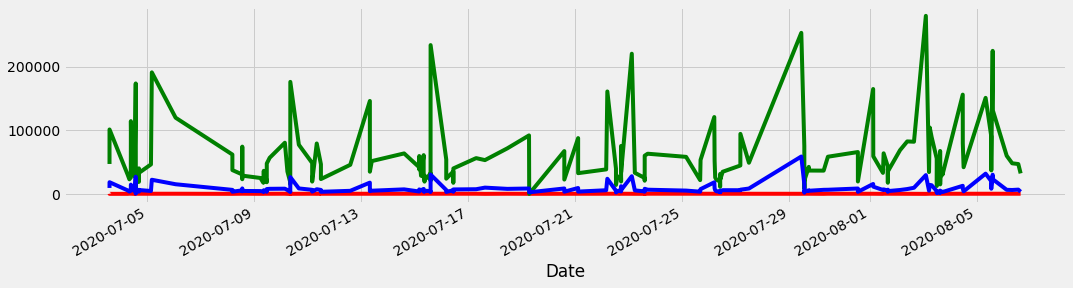

In [39]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');
tfav.plot(figsize=(16,4),color='g');
tret.plot(figsize=(16,4),color='b');


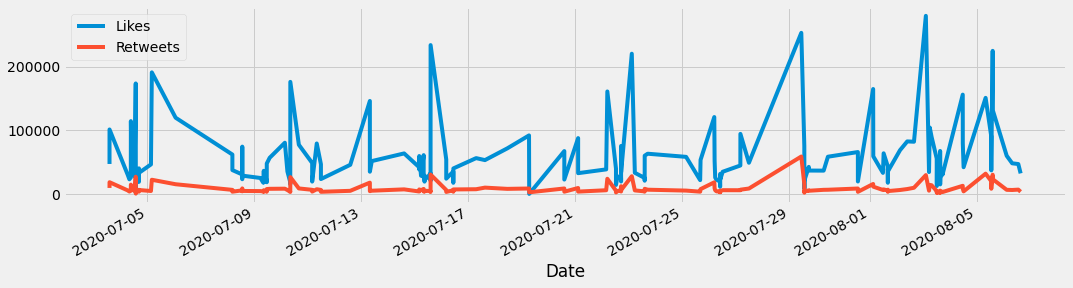

In [40]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [41]:
# We obtain all possible sources:
sources = []
for source in mined_data['Source']:
    if source not in sources:
        sources.append(source)
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web App
* Twitter Media Studio
* Periscope


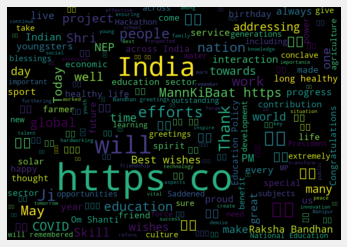

In [42]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

# word cloud visualization
allWords = ' '.join([twts for twts in mined_data['Tweets']])
wordCloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [43]:
mined_data

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"Thank you, Prime Minister @PresRajapaksa! It w...",262,1291395378563231745,2020-08-06 15:27:05,Twitter for iPhone,32190,3378,1
1,"At 11 AM on Friday, 7th August, I would be add...",277,1291363838235828225,2020-08-06 13:21:46,Twitter Web App,46884,6716,1
2,Remembering Sushma Ji on her first Punya Tithi...,275,1291280955638861826,2020-08-06 07:52:25,Twitter Web App,48035,6139,1
3,Saddened by the tragic hospital fire in Ahmeda...,269,1291206650930421760,2020-08-06 02:57:09,Twitter for iPhone,59872,6386,-1
4,A blessed day in Ayodhya. \n\nThis day will re...,269,1291019545138741248,2020-08-05 14:33:40,Twitter Web App,130945,22893,1
...,...,...,...,...,...,...,...,...
195,देववाणीं संस्कृतभाषां वैश्विके पटले प्रचारप्रस...,299,1279344668572971008,2020-07-04 09:21:52,Twitter for iPhone,25603,4922,0
196,"For @BJP4India Karyakartas, serving the nation...",301,1279325250514071553,2020-07-04 08:04:43,Twitter for iPhone,22917,3683,1
197,My address at the programme marking Dharma Cha...,85,1279303131193458693,2020-07-04 06:36:49,Periscope,29914,5472,0
198,विस्तारवाद का युग समाप्त हो चुका है। यह युग वि...,83,1279056607230529542,2020-07-03 14:17:13,Twitter Media Studio,101127,18353,0


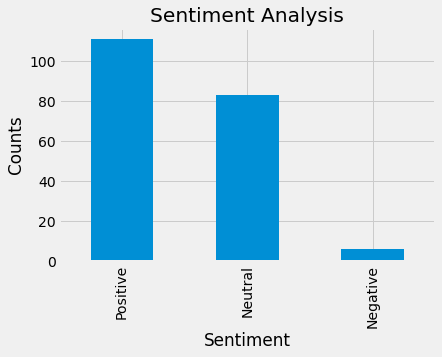

In [44]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

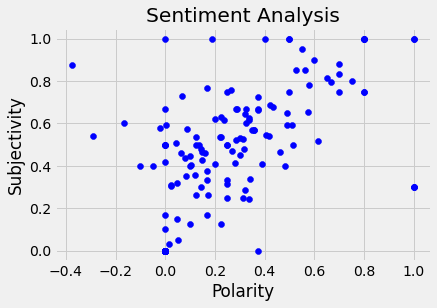

In [45]:
for i in range(0, mined_data.shape[0]):
    plt.scatter(tweets_df["Polarity"][i], tweets_df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color) 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


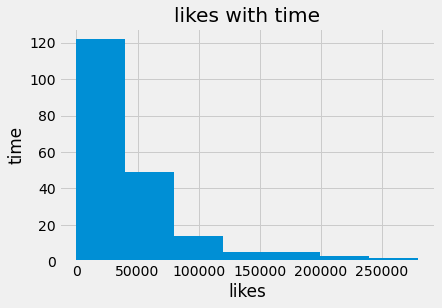

In [46]:
fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(mined_data['Likes'],bins = 7) # Here you can play with number of bins
#Labels and Tit
plt.title('likes with time')
plt.xlabel('likes')
plt.ylabel('time')
#interactive(False)

plt.show()
plt.close() 

In [48]:
#Saving Data for further Analysis
mined_data.to_csv("mined_data.csv")
tweets_df.to_csv("tweets_df.csv")